# Diabetes Prediction using Random Forests

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

## Changing the Categorical Variables into Numerical Values

In [3]:
df['gender'] = df['gender'].map({"Female": 0, "Male": 1})

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the 'smoking_history' column
df['smoking_history'] = le.fit_transform(df['smoking_history'])

df = pd.get_dummies(df, columns=['smoking_history'])

## Defining the Features (`X`) and Target Variables (`y`)

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the model

In [7]:
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [8]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.to_numpy().reshape(len(y_test), 1)), 1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


## Model Evaluation

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[18726     0]
 [    0  1274]]
1.0


## Visualizing the Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

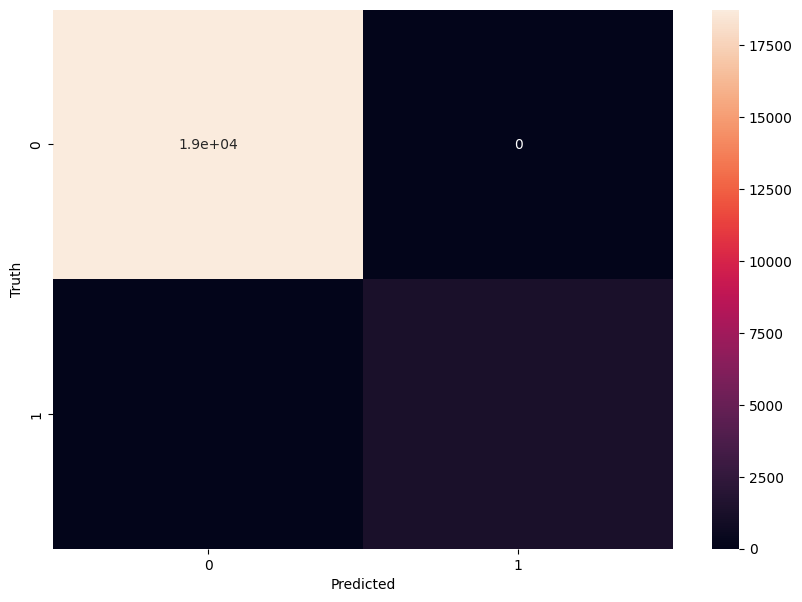

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Saving the Actual and Predicted Values DataFrame into a CSV File

In [11]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions.csv", index=False)

<hr>